In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model

import os
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2


# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL']='2'
%matplotlib inline

In [2]:
# gpu_device = tf.config.experimental.list_physical_devices('GPU')
# print(f"Number of GPU = {len(gpu_device)}")
# tf.config.experimental.set_memory_growth(gpu_device[0], True)

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print()
print(f'Shape of x_test: {x_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Image (#11): Which is digit 5


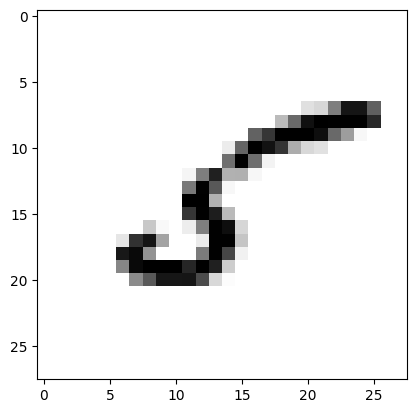

In [4]:
digit=11
a=x_train[digit]
plt.imshow(a,cmap='gray_r')
print(f"Image (#{digit}): Which is digit {y_train[digit]}")

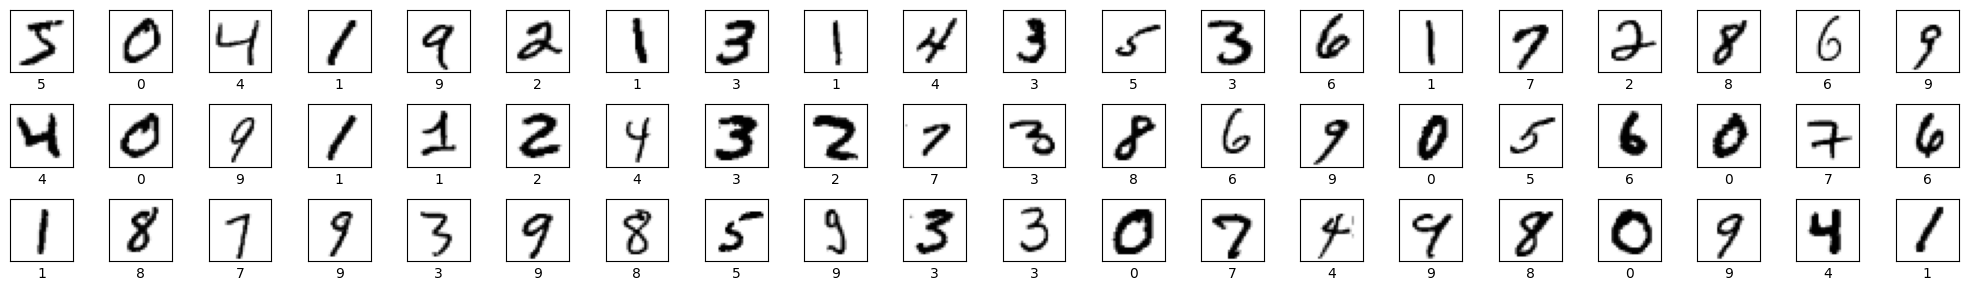

In [5]:
rows=3
cols=20
i=0

plt.figure(figsize=(20,3))
for r in range(rows):
  for c in range(cols):
    plt.subplot(rows,cols,i+1)
    plt.imshow(x_train[i],cmap=plt.cm.gray_r)

    plt.xticks([])
    plt.yticks([])
    plt.xlabel(y_train[i])
    i+=1
plt.tight_layout()
plt.show()

### Normalise Data

In [6]:
x_train=x_train.reshape(-1,28*28).astype('float32')/255.0
x_test=x_test.reshape(-1,28*28).astype('float32')/255.0

Image (#11): Which is digit '5'


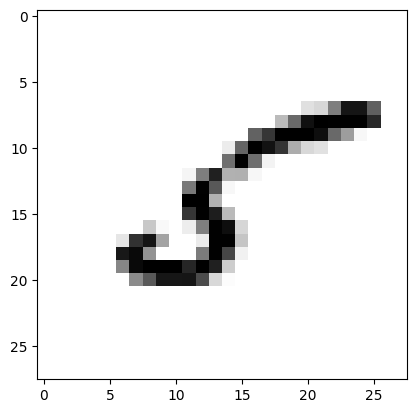

In [7]:
digit=11

a=x_train[digit].reshape(28,28)
plt.imshow(a,cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

## Build the model

In [8]:
model=keras.Sequential([
    keras.Input(shape=(784,)),
    layers.Dense(units=256,activation='relu'),
    layers.Dense(units=128,activation='relu'),
    layers.Dense(units=10,activation='softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the model

In [9]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## Train the model

In [10]:
h=model.fit(x=x_train,y=y_train,epochs=5,batch_size=64,validation_split=0.3)

Epoch 1/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9200 - loss: 0.2725 - val_accuracy: 0.9479 - val_loss: 0.1766
Epoch 2/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9669 - loss: 0.1078 - val_accuracy: 0.9645 - val_loss: 0.1223
Epoch 3/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9789 - loss: 0.0683 - val_accuracy: 0.9698 - val_loss: 0.1047
Epoch 4/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9840 - loss: 0.0504 - val_accuracy: 0.9667 - val_loss: 0.1145
Epoch 5/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9886 - loss: 0.0359 - val_accuracy: 0.9712 - val_loss: 0.1053


## Plot the training results

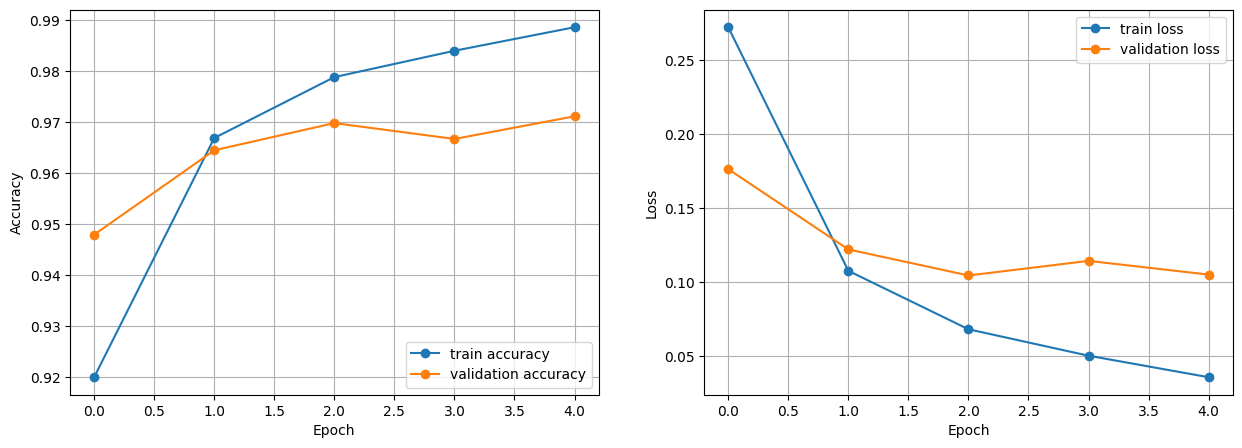

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'],'o-',label='train accuracy')
plt.plot(h.history['val_accuracy'],'o-',label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.subplot(1,2,2)
plt.plot(h.history['loss'],'o-',label='train loss')
plt.plot(h.history['val_loss'],'o-',label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()


## Evaluate the model on the test dataset

In [12]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print('\nTest accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9749 - loss: 0.0898

Test accuracy: 0.9749000072479248


## Make predictions on the entire test images

In [13]:
predictions=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


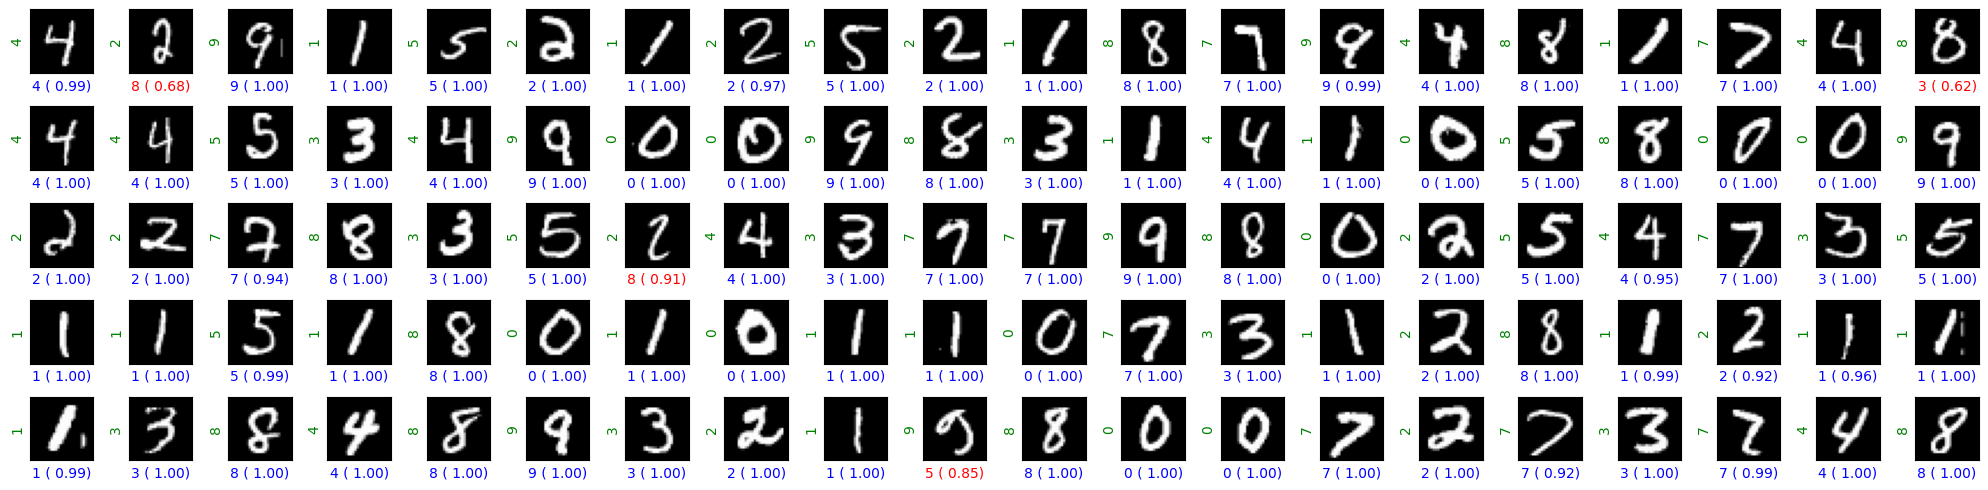

In [14]:
rows=5
cols=20

random_indices=random.sample(range(x_test.shape[0]),rows*cols)
sample_images=x_test[random_indices,:]
sample_labels=y_test[random_indices]
predictions=model.predict(sample_images)

i=0

plt.figure(figsize=(20,5))

for r in range(rows):
  for c in range(cols):
    plt.subplot(rows,cols,i+1)
    plt.imshow(sample_images[i].reshape(28,28),cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    prediction=np.argmax(predictions[i])
    confidence=predictions[i][prediction]
    if sample_labels[i]==prediction:
      plt.xlabel(f"{prediction} ({confidence: .2f})",color='b')
    else:
      plt.xlabel(f"{prediction} ({confidence: .2f})",color='r')
    plt.ylabel(sample_labels[i],color='g')
    i+=1
plt.tight_layout()
plt.show()


## Predict a single image

In [15]:
# model.save('model/mnist_model.keras')